In [1]:
from fastai.vision.all import *
import fastai
import torch
import torchvision
import os

/home/kaja/anaconda3/envs/fastbook/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370172916/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


TODO 
normalization
progressive resizing
tta

In [5]:
def get_dls(bs, size):
    dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2, seed=42),
                 get_y = parent_label,
                 item_tfms=RandomResizedCrop(size, min_scale=0.01),
                 batch_tfms=[Normalize()])
    return dblock.dataloaders("data/houn", bs=bs)

In [22]:
dls = get_dls(128,128)

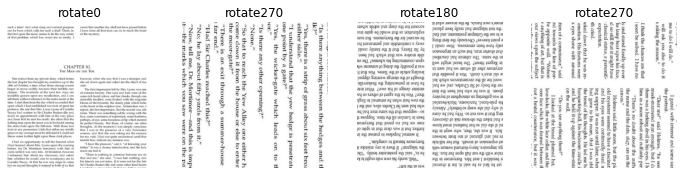

In [4]:
dls.train.show_batch(max_n=4, nrows=1)

In [24]:
learn = cnn_learner(dls, resnet18, metrics=[error_rate])
learn.fine_tune(10,3e-2)

epoch,train_loss,valid_loss,error_rate,time
0,2.457411,1.859088,0.483333,00:07


epoch,train_loss,valid_loss,error_rate,time
0,1.709147,1.775806,0.450000,00:08
1,1.495848,1.858321,0.600000,00:08
2,1.386355,2.452142,0.550000,00:08
3,1.514566,2.363003,0.433333,00:08
4,1.661502,3.284724,0.266667,00:09
5,1.502012,4.884781,0.266667,00:08
6,1.444183,4.122052,0.300000,00:08
7,1.317339,3.247215,0.300000,00:08
8,1.218140,2.867643,0.300000,00:08
9,1.149847,2.128155,0.266667,00:08


In [25]:
learn.dls = get_dls(64, 224)
learn.fine_tune(10, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.793680,0.808466,0.266667,00:16


epoch,train_loss,valid_loss,error_rate,time
0,0.596316,0.720868,0.266667,00:21
1,0.519355,0.286539,0.150000,00:21
2,0.465562,0.100032,0.050000,00:23
3,0.446660,0.091905,0.050000,00:22
4,0.445241,0.089750,0.033333,00:23


In [80]:
interp = ClassificationInterpretation.from_learner(learn)
interp.confusion_matrix()

array([[22,  0,  0,  0],
       [ 0, 12,  1,  0],
       [ 0,  0,  9,  0],
       [ 0,  0,  1, 15]])

In [92]:
# Validation Accuracy
preds, targs = learn.get_preds(dl=learn.dls.valid)
accuracy(preds,targs)

TensorBase(0.9667)

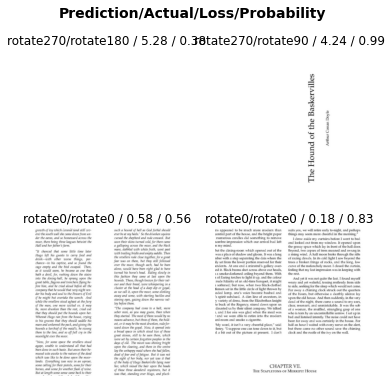

In [93]:
interp.plot_top_losses(k=4)

In [97]:
learn.export(fname='learner.pkl')

In [96]:
doc(Learner.export)